In [1]:
# https://www.semion.io/doc/statistical-mechanics-of-money


In [1]:
# Importar librerías científicas

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pylab import *
import matplotlib.animation as animation

In [2]:
# Crear estilo de plots
# IPython_default = plt.rcParams.copy()

from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [3]:
# Definir clases y funciones necesarias
class System(object):
    def __init__(self, agents, deltam):
        self.M = np.sum(agents) #static
        self.N = len(agents) #static
        self.deltam = deltam #static
        
        self.agents = agents #dynamic
        self.iterations = 0 #dynamic
        self.transactions = 0 #dynamic

    def getAgents(self):
        return self.agents
    
    def setAgents(self,agents):
        self.agents = agents
        
    def getIterations(self):
        return self.iterations
    
    def setIterations(self, iterations):
        self.iterations = iterations
        
    def getTransactions(self):
        return self.transactions
    
    def setTransactions(self,transactions):
        self.transactions = transactions
        
    def iterate(self, times=1):
        
        indices = np.arange(0,self.N)
        
        for iteration in range(times):
            for k in range(len(self.agents)):
                l = np.random.choice(indices, 1)
                self.simulateTransaction(k,l)
            self.iterations += 1

        
    def simulateTransaction(self,k,l):
        
#         if np.random.random() < 0.5:
#             s = 1
#         else:
#             s = -1
            
        auxAgents = self.getAgents().copy()
        auxDeltam = self.deltam
        mny = auxAgents[l].copy() - auxDeltam
        
        if(mny >= 0):
            auxAgents[k] = auxAgents[k] + auxDeltam
            auxAgents[l] = auxAgents[l] - auxDeltam
            self.transactions += 1
            
        self.setAgents(auxAgents)
            
    def getEntropy(self,numClasses, mMax):
        return S(self.agents, numClasses, mMax)
    
    def getRichestAgent(self):
        return np.max(self.agents)
    
    def getWellness(self, numClasses, mMax,func):
        return O(self.agents, numClasses,mMax, func)
    
# Function S takes an array of real numbers (i.e. the amount of money each agent has) and calculates entropy
def S(agents, numClasses, mMax):
    frequencies, binEdges = np.histogram(agents, bins=numClasses, range=[0,mMax])
    agents = np.array(agents)
    positiveFrequencies = frequencies[frequencies > 0]
    return N*np.log(N) - np.sum(positiveFrequencies*np.log(positiveFrequencies)) 


def runSystemEvolution(system, snapshots, iterations = 1):
    arrStates.append(system.getAgents())
    arrTransactions.append(system.getTransactions())
    for i in range(snapshots):
        system.iterate(iterations)
        arrStates.append(system.getAgents())
        arrTransactions.append(system.getTransactions())

def calculateEntropiesEvolution(numClasses,mMax):
    
    for state in arrStates:
        arrEntropies.append(S(state,numClasses,mMax))
        
def calculateWellnessEvolution(numClasses,mMax,func):
    
    for state in arrStates:
        arrWellness.append(O(state,numClasses,mMax,func))
        
def plotStateProgession(index):
    plotState(arrStates[index], arrTransactions[index], arrTransactions[-1], arrEntropies[index],arrWellness[index],numClasses,mMax)
    
def plotState(agents, transactionsToBeMade, transactionsMade, systemEntropy,systemWellness, numClasses,mMax):
    
    # ax is the variable where simulations are going to be graphed
    # these figures should already exist when executing this function
    for ax in (ax1,ax2):
        ax.cla()
    
    titleContent = "Statistical Mechanics of Money \n"
    titleContent += "\n"    
    titleContent += "Total transactions: " + str(transactionsMade) + "\n"
    titleContent += "M = " + str(M) + " (money units)   |    N = " + str(N) + " (people) \n"
    titleContent += "Progress: " + str(np.round((transactionsToBeMade/transactionsMade)*100, 4)) + "%"
  
    plt.suptitle(titleContent);
    plt.subplots_adjust(top=0.77);
    plt.subplots_adjust(bottom=0.1)
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    # Start subplots
    ax1.set_title('counts')
    ax1.set_xlabel('[money units]')
    ax1.set_ylabel('[counts]')
    ax1.hist(agents, bins=numClasses, range=[0,mMax])

    ax2.set_title('ln(counts)')
    ax2.set_xlabel('[money units]')
    ax2.set_ylabel('[counts]')
    ax2.hist(agents, bins=numClasses, range=[0,mMax])   
    ax2.set_yscale('log')
    
    ax3.set_title("Current entropy: S = " + str(np.round(systemEntropy,10)))
    ax3.set_xlabel('[transactions]')
    ax3.set_ylabel('S')
    yEntropy_data.append(systemEntropy)
    xEntropy_data.append(transactionsToBeMade)
    ax3.plot(xEntropy_data,yEntropy_data, 'm')
    
    ax4.set_title("Wellnes: O = " + str(np.round(systemWellness,10)))
    ax4.set_xlabel('[transactions]')
    ax4.set_ylabel('O(Mk)')
    yWellness_data.append(systemWellness)
    xWellness_data.append(transactionsToBeMade)
    ax4.plot(xWellness_data,yWellness_data, 'm')
    

    
def deltaDistribution(M,N):
    return np.ones(N)*M/N

def uniformDistribution(M,N,numClasses):
    
    G = int(N/numClasses)
    ags = []

    for l in range(G):
        for k in range(numClasses):
            ags.append(l)
    
    ags = np.array(ags)*M/np.sum(ags)
    return ags, np.max(ags)

def O1_a(M):
    return 2*M

def O1_b(M):
    return 1 - np.exp(-2*M)

def O(agents, numClasses,mMax, func):
    frequencies = np.histogram(agents, bins=numClasses, range=[0,mMax])
    frequencies, binEdges = np.histogram(agents, bins=numClasses, range=[0,mMax])
    summation = 0
    for k in range(len(binEdges)-1):
        frequency = frequencies[k]
        ags = np.array(agents).copy()
        ags = ags[ags >= binEdges[k]]
        ags = ags[ags < binEdges[k+1]]
        Mk = 0
        Mk = np.sum(ags)
        summation += frequency*func(Mk)
        
    return summation
#     agents = np.array(agents)
#     positiveFrequencies = frequencies[frequencies > 0]
#     return N*np.log(N) - np.sum(positiveFrequencies*np.log(positiveFrequencies))
    

In [9]:
M = 10000 # total amount of money in system
N = 5000 # number of agents
deltam = 0.5 # amount of money exchanged in each transaction
numClasses = 20

In [10]:
# DIRAC DELTA DISTRIBUTION
mMax = 10
agents = deltaDistribution(M,N)

In [31]:
# UNIFORM DISTRIBUTION
agents, mMax = uniformDistribution(M,N,numClasses)

In [11]:
# DON'T MODIFY BELLOW THIS CELL
sys = System(agents,deltam)
arrStates = []
arrTransactions = []

In [12]:
# ADD ITERATIONS TO CURRENT SYSTEM
snapshots = 200
iterations = 1
runSystemEvolution(sys, snapshots, iterations)


<IPython.core.display.Javascript object>


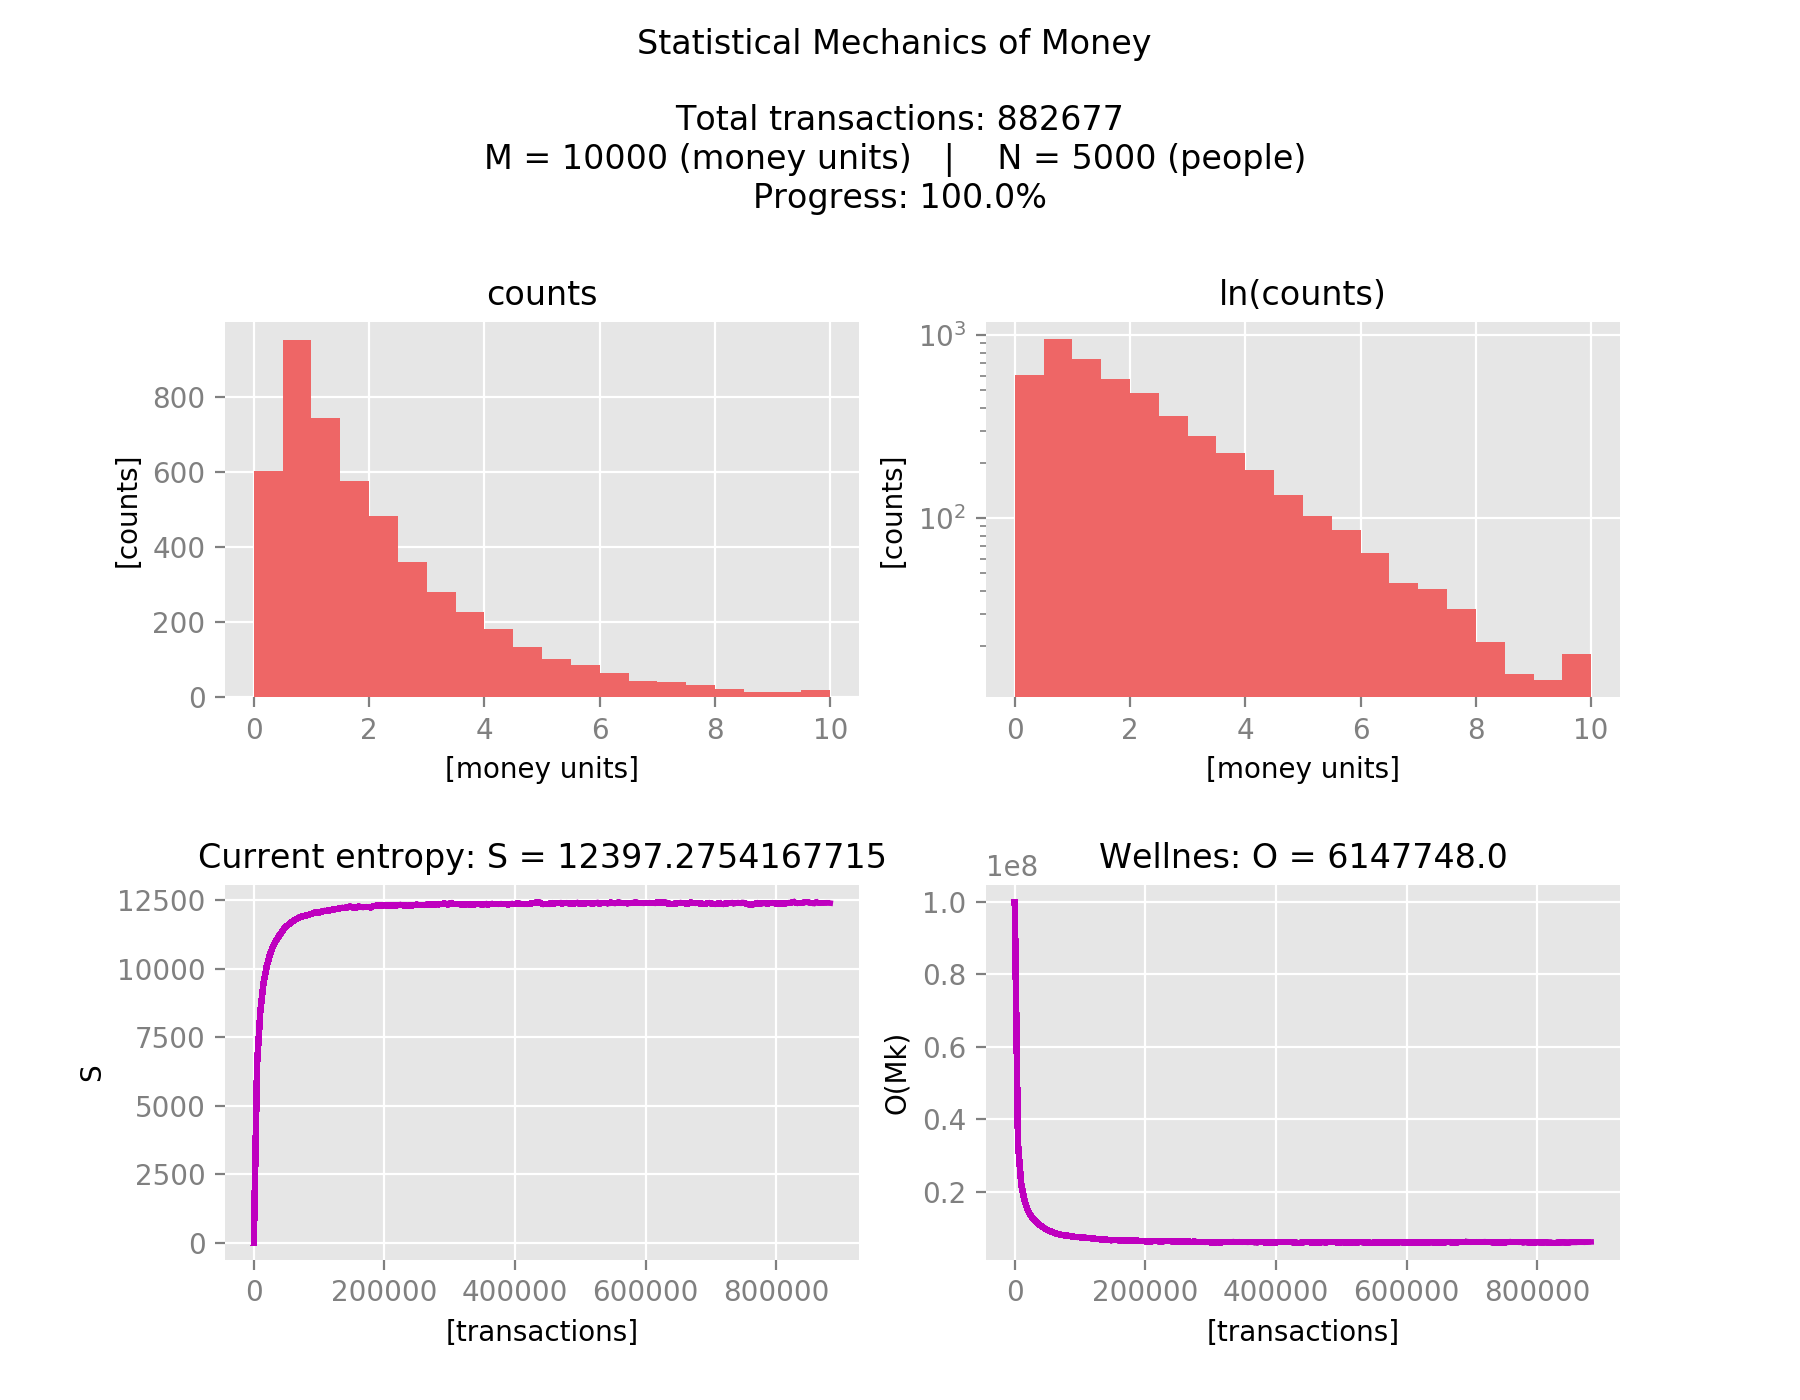

In [13]:
# ---------- SIMULATION PLOTTING CELL -----------------
if 'fig' in globals():
    plt.close(fig)
    
# mMax = 8

# IT IS BETTER TO CALCULATE THE ENTROPIES RIGHT BEFORE THE SIMULATION BECAUSE
# BY THAT MOMENT YOU HAVE THE HISTORICAL SYSTEM INFO
arrEntropies = []
arrWellness = []
calculateEntropiesEvolution(numClasses,mMax)
calculateWellnessEvolution(numClasses, mMax,O1_a)


# %matplotlib nbagg
# %matplotlib tk
# %matplotlib TkAgg
%matplotlib notebook
# %matplotlib auto


fig = plt.figure(figsize=(9,7))
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, -2:])
ax3 = fig.add_subplot(gs[1, :2])
ax4 = fig.add_subplot(gs[1, -2:])

yEntropy_data = []
xEntropy_data = []
yWellness_data = []
xWellness_data = []
simulation = animation.FuncAnimation(fig, plotStateProgession, interval=50, repeat=True, save_count=200)

# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=10, metadata=dict(artist='Me'))
# simulation.save('system_M10000_N5000_C20.mp4', writer=writer)
plt.show()





In [110]:
uniformEntropies
deltaEntropies 

[0.0,
 3247.6769091602036,
 5663.2579282099905,
 6409.291320378674,
 7156.053470320963,
 7693.216609532094,
 8186.682044469308,
 8569.147624808305,
 8890.837107764317,
 9127.753221144136,
 9375.929293901369,
 9596.586251505803,
 9759.676009391085,
 9888.141025663637,
 10054.052123775462,
 10141.143862097913,
 10252.731023249424,
 10352.183875323866,
 10466.171646428145,
 10561.127330919022,
 10646.487521897718,
 10716.20853954754,
 10790.191598339792,
 10887.974798613177,
 10937.554408925069,
 11005.499129535121,
 11048.485222262549,
 11089.211112873083,
 11128.503651634128,
 11176.614836183831,
 11221.631768942429,
 11237.474541633877,
 11268.65747280468,
 11293.722282252722,
 11339.863123346815,
 11364.179073295894,
 11393.150732351743,
 11434.186861719954,
 11475.217330721523,
 11494.229212871436,
 11511.176494937179,
 11539.403157856425,
 11565.197772853884,
 11595.693381018918,
 11611.728115429269,
 11629.146095019274,
 11649.749137862971,
 11658.327060575197,
 11675.904411705269,

In [14]:
import matplotlib.patches as mpatches
plt.plot(arrTransactions, uniformEntropies)

red_patch = mpatches.Patch(label='Initial uniform distribution')
plt.legend(handles=[red_patch])

plt.plot(arrTransactions, deltaEntropies)
blue_patch = mpatches.Patch(color='steelblue',label='Initial Dirac delta distribution')
plt.legend(handles=[red_patch,blue_patch])

plt.title('Entropy')
plt.ylabel('S')
plt.xlabel('[transactions]')


NameError: name 'uniformEntropies' is not defined

In [25]:
plotState(arrStates[0],arrTransactions[0],arrTransactions[-1],0,20,10)
plt.show()

In [20]:
np.array(arrStates[190])[arrStates[130]<0.5]

array([ 3.5,  1.5,  0. ,  0. ,  1.5,  0.5,  2.5,  0. ,  0.5,  0. ,  0.5,
        1. ,  1.5,  1. ,  0.5,  2.5,  0. ,  0. ,  0.5,  4.5,  1.5,  0. ,
        0. ,  0.5,  4. ,  1.5,  0.5,  1. ,  1.5,  0. ,  1.5,  3.5,  1. ,
        0. ,  0. ,  3. ,  1. ,  1. ,  1. ,  0.5,  1. ,  1.5,  5. ,  0.5,
        3. ,  0.5,  0. ,  4.5,  1. ,  1. ,  5. ,  0.5,  2.5,  0.5,  1.5,
        1. ,  0.5,  0. ,  3.5,  1. ,  0. ,  2. ,  0. ,  0.5,  1. ,  0.5,
        0.5,  1.5,  1.5,  1.5,  2. ,  0.5,  0. ,  0. ,  5.5,  0.5,  2. ,
        2. ,  1.5,  1. ,  0.5,  0. ,  1.5,  2.5,  0. ,  6.5,  0. ,  3.5,
        2. ,  3.5,  1.5,  1.5,  1. ,  6.5,  0.5,  0. ,  0. ,  0.5,  0. ,
        1.5,  0. ,  0.5,  1. ,  0. ,  0.5,  0. ,  0. ,  1.5,  0. ,  1. ,
        0. ,  4. ,  0. ,  0.5,  0.5,  1.5,  1.5,  0. ,  2. ,  1.5,  0.5,
        3. ,  1. ,  0. ,  0. ,  3.5,  0. ,  0. ,  0. ,  0.5,  4. ,  2.5,
        0. ,  0.5,  3. ,  1. ,  0. ,  2. ,  0. ,  6.5,  1. ,  3.5,  1. ,
        1. ,  1.5,  0. ,  0.5,  1. ,  1. ,  2. ,  0

## csv = np.genfromtxt('arrStates_1046_states.csv', delimiter=",")


In [55]:
np.max(sys.getAgents())

15.5

In [72]:
csv


array([[   2.,    2.,   -1., ...,   99.,   99.,   99.],
       [   2.,    3.,    3., ..., -151., -149., -148.],
       [   2.,    2.,    0., ...,  -52.,  -52.,  -52.],
       ...,
       [   2.,    2.,   -2., ...,  -46.,  -46.,  -47.],
       [   2.,    5.,    8., ...,  -37.,  -37.,  -35.],
       [   2.,    3.,   -1., ...,   87.,   89.,   86.]])

In [12]:
# For closing all figures with code
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.close.html

# For if you wanted to try different backends
# https://stackoverflow.com/questions/25333732/matplotlib-animation-not-working-in-ipython-notebook-blank-plot
